# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [7]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [9]:
#seu código aqui
(df.isnull().sum()/len(df))*100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [11]:
#seu código aqui
df.dropna(subset=['Genero'], inplace=True)
df.dropna(subset=['PhoneService'], inplace=True)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

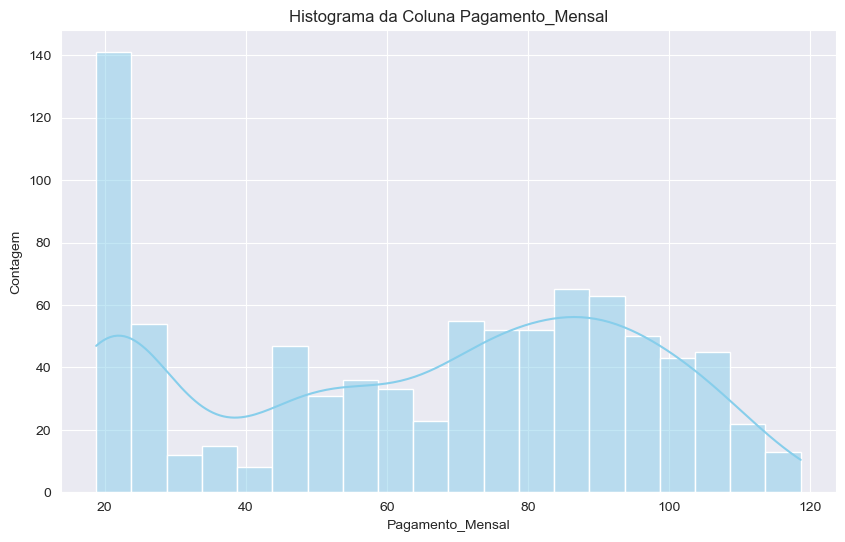

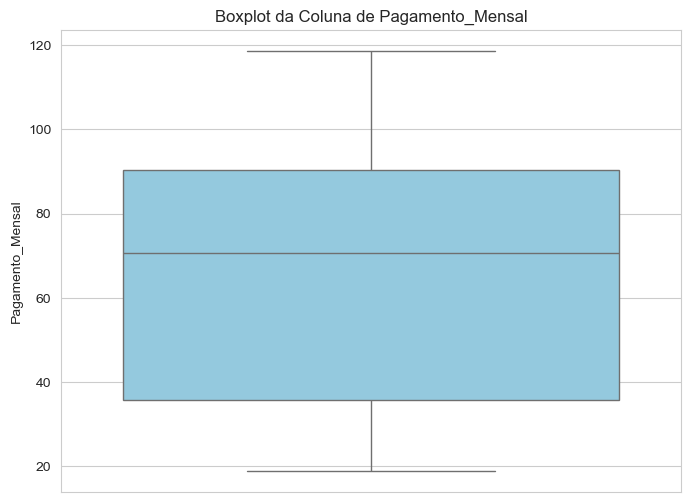

64.7914534883721

In [13]:
#seu código aqui

sns.set_style('darkgrid')

#Plata o histograma dos salários para analisarmos a distribuição dos dados

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna Pagamento_Mensal')
plt.xlabel('Pagamento_Mensal')
plt.ylabel('Contagem')
plt.show()


sns.set_style('whitegrid')

#Plata o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento_Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

df['Pagamento_Mensal'].mean()






In [15]:

# Converte a coluna para numérico, substituindo erros por NaN
df['Pagamento_Mensal'] = pd.to_numeric(df['Pagamento_Mensal'], errors='coerce')

# Agora preenche os valores ausentes (NaN) com o valor desejado
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(65.60)

# Verifica se há ainda valores ausentes ou erros
print(df['Pagamento_Mensal'].isna().sum())  # Para verificar quantos valores ainda estão NaN

# Agora, calcula a média corretamente
media_pagamento = df['Pagamento_Mensal'].mean()
print(media_pagamento)



0
64.9087972166998


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [55]:
df['Servico_Internet'].unique()


array(['DSL', 'NO', 'FIBER OPTIC'], dtype=object)

In [41]:
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Servico_Internet'].unique()

array(['DSL', 'NO', 'FIBER OPTIC'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [57]:
df.rename(columns={'Genero':'Gender'}, inplace=True)
df.rename(columns={'Idoso':'SeniorCitizen'}, inplace=True)
df.rename(columns={'Casado':'Married'}, inplace=True)
df.rename(columns={'Tempo_como_Cliente':'TimeAsCustomer'}, inplace=True)
df.rename(columns={'Servico_Internet':'InternetService'}, inplace=True)
df.rename(columns={'Servico_Seguranca':'SecurityService'}, inplace=True)
df.rename(columns={'Suporte_Tecnico':'TechSupport'}, inplace=True)
df.rename(columns={'Tipo_Contrato':'ContractType'}, inplace=True)
df.rename(columns={'Pagamento_Mensal':'MonthlyPayment'}, inplace=True)
df.rename(columns={'Total_Pago':'TotalPaid'}, inplace=True)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       1006 non-null   object 
 1   Gender           1006 non-null   object 
 2   SeniorCitizen    1006 non-null   int64  
 3   Married          1006 non-null   object 
 4   Dependents       1006 non-null   object 
 5   TimeAsCustomer   1006 non-null   int64  
 6   PhoneService     1006 non-null   object 
 7   InternetService  1006 non-null   object 
 8   SecurityService  1006 non-null   object 
 9   TechSupport      1006 non-null   object 
 10  StreamingTV      1006 non-null   object 
 11  ContractType     1006 non-null   object 
 12  PaymentMethod    1006 non-null   object 
 13  MonthlyPayment   1006 non-null   float64
 14  TotalPaid        1006 non-null   float64
 15  Churn            1006 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usage: 133.6+ KB
